
**<br>Understanding Benfords law on a COVID dataset**
**<br>Author: Jatan Pandya**
**<br>Date: 1/11/2020** 


In [36]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chisquare


**Read the CSV file**

In [141]:
covid19_df = pd.read_csv('covid19_db/us_covid19_daily.csv')
covid19_df
df = covid19_df.copy()
df['Value'] = df['death']
df


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,Value
0,20200810,56,5060880,57452294,3966.0,48612.0,334347.0,9216.0,15158.0,2533.0,...,62517140,62513174,62513174,426,1654,674422,41807,716229,80e59c48dcdce8c0fa8760d93a4d1bf0c1a58c35,154947.0
1,20200809,56,5019073,56777872,3871.0,49048.0,332693.0,9303.0,15081.0,2507.0,...,61800816,61796945,61796945,616,838,661522,51319,712841,83d72910d9f712693eee3f8ca13182a53c81547a,154521.0
2,20200808,56,4967754,56116350,3888.0,50016.0,331855.0,9652.0,15024.0,2566.0,...,61087992,61084104,61084104,1089,1431,614455,54091,668546,b538b3af9fdc175ec448e61facfd4b323fa32452,153905.0
3,20200807,56,4913663,55501895,3988.0,51325.0,330424.0,9670.0,14925.0,2617.0,...,60419546,60415558,60415558,1333,8036,701363,61520,762883,5993b88a31d3b6f804a4bde28c014e3b77a9f592,152816.0
4,20200806,56,4852143,54800532,3903.0,53015.0,322388.0,9976.0,14810.0,2718.0,...,59656578,59652675,59652675,1251,2682,677516,54184,731700,c85e8de66179ee297a8cb5f4f04e8eb62834a3ea,151483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,20200126,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,0,0,0,0,0,e1cf59ab48e1cf367c4a6798a508a23d9d36bd18,NaN
198,20200125,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,0,0,0,0,0,bef2a1d5f2a13491e0e0369bbd46c10cdd12973b,NaN
199,20200124,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,0,0,0,0,0,bfffe76fc0b7cf11efe8aecd3cc7b22598d77d61,NaN
200,20200123,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,2,0,0,0,0,0,cee36ebf3174bf1df0daa36e1e8088a157406fad,NaN


**Ignore NaN values by replacing them with zero. Zero is ignored while calculating the observed frequencies. Only 1-9 are considered**

In [142]:

df['Value'] = df['Value'].fillna(0)

df['Value'].isnull().any()


False

**Find the first non-zero digit in the value column and store it back to the Value column**
**TODO: Can we vectorize this operation? Don't use for loop**

In [143]:
def less_than_1(num):
    i=1
    while int(num*(10**i)) == 0:
        i=i+1       
    return int(num*(10**i))
    
def greater_than_equal_to_10(num):
    i = 1
    while (num//(10**i)) >= 10:
        i = i+1
        
    return (num//(10**i))
            

##Write a function that returns the first digit
def return_first_digit(x):
    ##Number is zero - ignore
    if x == 0:
        return x
    ##Number is less than 1. Find the first non-zero digit
    elif int(x) == 0:
        return less_than_1(x)
    ##Number is greater than 1 and less than 10. Use it directly
    elif int(x < 10):
        return int(x)
    ##Number is greater than or equal to 10. Find the first digit
    else:
        return greater_than_equal_to_10(x)        
         
for i in df.index:
    df.loc[i,'Value'] = return_first_digit(df.loc[i]['Value'])
        
df.head()
       


,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash,Value
0,20200810,56,5060880,57452294,3966.0,48612.0,334347.0,9216.0,15158.0,2533.0,...,62517140,62513174,62513174,426,1654,674422,41807,716229,80e59c48dcdce8c0fa8760d93a4d1bf0c1a58c35,1.0
1,20200809,56,5019073,56777872,3871.0,49048.0,332693.0,9303.0,15081.0,2507.0,...,61800816,61796945,61796945,616,838,661522,51319,712841,83d72910d9f712693eee3f8ca13182a53c81547a,1.0
2,20200808,56,4967754,56116350,3888.0,50016.0,331855.0,9652.0,15024.0,2566.0,...,61087992,61084104,61084104,1089,1431,614455,54091,668546,b538b3af9fdc175ec448e61facfd4b323fa32452,1.0
3,20200807,56,4913663,55501895,3988.0,51325.0,330424.0,9670.0,14925.0,2617.0,...,60419546,60415558,60415558,1333,8036,701363,61520,762883,5993b88a31d3b6f804a4bde28c014e3b77a9f592,1.0
4,20200806,56,4852143,54800532,3903.0,53015.0,322388.0,9976.0,14810.0,2718.0,...,59656578,59652675,59652675,1251,2682,677516,54184,731700,c85e8de66179ee297a8cb5f4f04e8eb62834a3ea,1.0


**Add the count column, which indicates the observed frequencies**

In [144]:
df.insert(2, 'Count',df['Value'])

**Count column calculates the frequencies of the digits**

In [145]:
hist = df[['Value','Count']].groupby('Value').count()
hist

,Count
Value,
0.0,35
1.0,86
2.0,14
3.0,10
4.0,9
5.0,11
6.0,8
7.0,8
8.0,10


**Drop the zero**

In [146]:


if(hist.index[0] == 0.0):
    hist_zero_dropped = hist.drop(hist.index[0])
else:
    hist_zero_dropped = hist
    
print(hist_zero_dropped)



       Count
Value       
1.0       86
2.0       14
3.0       10
4.0        9
5.0       11
6.0        8
7.0        8
8.0       10
9.0       11


**Count in percentages**

In [147]:
total_count = hist_zero_dropped.sum()
normalized_final_hist = (hist_zero_dropped['Count']/total_count['Count'])*100
print(type(normalized_final_hist))
normalized_final_hist

<class 'pandas.core.series.Series'>


Value
1.0    51.497006
2.0     8.383234
3.0     5.988024
4.0     5.389222
5.0     6.586826
6.0     4.790419
7.0     4.790419
8.0     5.988024
9.0     6.586826
Name: Count, dtype: float64

**New dataframe with both actual and expected frequency distributions**

In [148]:
d = {'actual' : normalized_final_hist,
    'expected' : pd.Series([30.1, 17.6, 12.5,9.7,7.9,6.7,5.8,5.1,4.6], index=[1.0, 2.0, 3.0,4.0,5.0,6.0,7.0,8.0,9.0])}
df = pd.DataFrame(d)
df


,actual,expected
1.0,51.497006,30.1
2.0,8.383234,17.6
3.0,5.988024,12.5
4.0,5.389222,9.7
5.0,6.586826,7.9
6.0,4.790419,6.7
7.0,4.790419,5.8
8.0,5.988024,5.1
9.0,6.586826,4.6


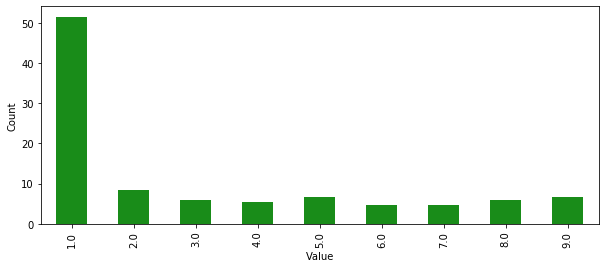

In [149]:
fig, ax = plt.subplots(figsize=(10,4))
plt.xlabel('First Digit')
plt.ylabel('Count')
normalized_final_hist.plot(kind = 'bar', ax=ax, alpha = 0.9,color='g' )

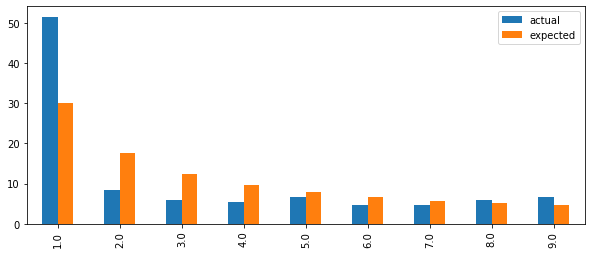

In [150]:
df.plot(kind = 'bar',figsize=(10,4))

**Chi-Square hypothesis testing**

In [151]:
chisquare(df['actual'], df['expected'])


Power_divergenceResult(statistic=27.29625767818928, pvalue=0.0006283341939039303)